# Jobsheet 14

Afrizal Qurratul Faizin - 2341720083

Jobsheet 14 - Convulsion Neural Network

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Langkah 2 - Preprocessing Data

In [5]:
# 2.1 Pra-pengolahan Data Training
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('../../dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [6]:
# 2.2 Pra-pengolahan Data Testing
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('../../dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Langkah 3
Buat Model CNN

In [7]:
cnn = tf.keras.models.Sequential()
# Layer Convolutional 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
# Pooling 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Convolutional Layer 2 & Pooling 2
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Flat
cnn.add(tf.keras.layers.Flatten())
# Full Connect - INPUT
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Full Connect - OUTPUT
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# COMPILE
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\AyatsuriKuragari\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Langkah 4 - Fit CNN

In [8]:
# Fit CNN to training set
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.5749 - loss: 0.6773 - val_accuracy: 0.6565 - val_loss: 0.6329
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 246ms/step - accuracy: 0.6576 - loss: 0.6263 - val_accuracy: 0.6450 - val_loss: 0.6174
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 239ms/step - accuracy: 0.6865 - loss: 0.5903 - val_accuracy: 0.6875 - val_loss: 0.5777
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 243s 974ms/step - accuracy: 0.7237 - loss: 0.5458 - val_accuracy: 0.7140 - val_loss: 0.5583
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 108s 430ms/step - accuracy: 0.7433 - loss: 0.5141 - val_accuracy: 0.7635 - val_loss: 0.5035
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 243ms/step - accuracy: 0.7471 - loss: 0.5083 - val_accuracy: 0.7630 - val_loss: 0.4982
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 203ms/step - accuracy: 0.7706 - loss: 0.4796 - val_accuracy: 0.7735 - val_loss: 0.4907
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 62s 246ms/step - accuracy: 0.7779 - loss: 0

## Langkah 5 - Prediksi 1 Citra

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
dog


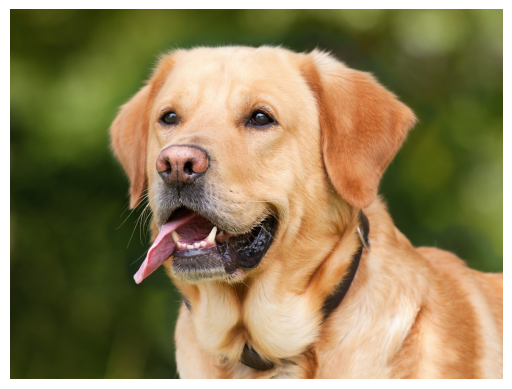

In [12]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../../dataset/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)
# Output Image
import matplotlib.pyplot as plt
img = image.load_img('../../dataset/dataset/single_prediction/cat_or_dog_1.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()